In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.manifold import TSNE

In [2]:
ingredient_to_category = {
    # Nuts
    "peanuts": "Nuts",
    "cashew": "Nuts",
    "chestnuts": "Nuts",
    "pistachios": "Nuts",
    "almond": "Nuts",
    "hazelnut": "Nuts",
    "walnuts": "Nuts",
    "pecans": "Nuts",
    "brazil_nut": "Nuts",
    "pili_nut": "Nuts",
    
    # Spices
    "cumin": "Spices",
    "star_anise": "Spices",
    "nutmeg": "Spices",
    "cloves": "Spices",
    "ginger": "Spices",
    "allspice": "Spices",
    "chervil": "Spices",
    "mustard": "Spices",
    "cinnamon": "Spices",
    "saffron": "Spices",
    
    # Herbs
    "angelica": "Herbs",
    "garlic": "Herbs",
    "chives": "Herbs",
    "turnip": "Herbs",
    "dill": "Herbs",
    "mugwort": "Herbs",
    "chamomile": "Herbs",
    "coriander": "Herbs",
    "oregano": "Herbs",
    "mint": "Herbs",
    
    # Fruits
    "kiwi": "Fruits",
    "pineapple": "Fruits",
    "banana": "Fruits",
    "lemon": "Fruits",
    "mandarin_orange": "Fruits",
    "strawberry": "Fruits",
    "apple": "Fruits",
    "mango": "Fruits",
    "peach": "Fruits",
    "pear": "Fruits",
    
    # Vegetables
    "cauliflower": "Vegetables",
    "brussel_sprouts": "Vegetables",
    "broccoli": "Vegetables",
    "sweet_potato": "Vegetables",
    "asparagus": "Vegetables",
    "avocado": "Vegetables",
    "radish": "Vegetables",
    "tomato": "Vegetables",
    "potato": "Vegetables",
    "cabbage": "Vegetables",
}


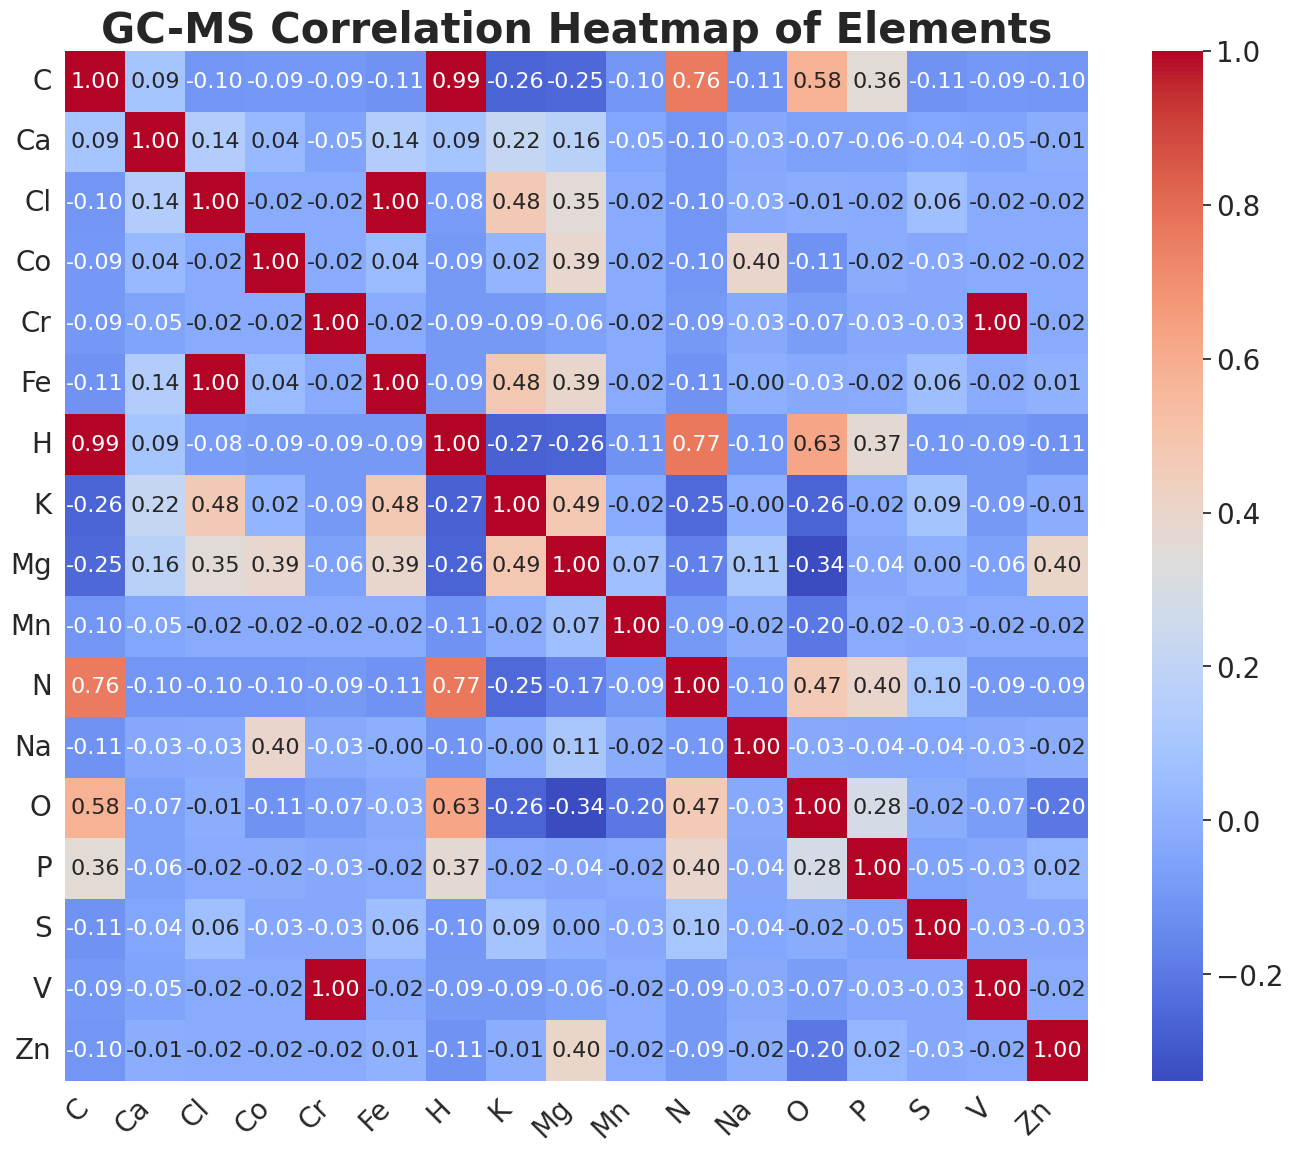

In [14]:
df = pd.read_csv("/home/dewei/workspace/smell-net/processed_full_gcms_dataframe.csv")
corr = df.drop(columns=['food_name']).corr()

# Create the heatmap with larger font sizes
plt.figure(figsize=(14, 12))  # Bigger figure
ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    annot_kws={"size": 16}  # Larger numbers inside cells
)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=20)  # ← Increase font size here

plt.title("GC-MS Correlation Heatmap of Elements", fontsize=30, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.tight_layout(pad=2.0)
plt.show()

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load and process GC-MS data
df = pd.read_csv("/home/dewei/workspace/smell-net/processed_full_gcms_dataframe.csv")
df['category'] = df['food_name'].map(ingredient_to_category)
features = df.drop(columns=['food_name', 'category'])

# PCA computation
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)
explained_var = pca.explained_variance_ratio_

# Add PCA results to dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Set Seaborn style
sns.set(style="whitegrid", context="notebook")

# Plot
plt.figure(figsize=(12, 10))
palette = sns.color_palette("Set2")  # Optionally: "tab10", "Set1", or custom

sns.scatterplot(
    data=df,
    x='PCA1',
    y='PCA2',
    hue='category',
    palette=palette,
    s=160,               # Larger points
    alpha=0.8,
    edgecolor='w',
    linewidth=0.5
)

# Titles and labels
plt.title("PCA of GC-MS Features by Ingredient Category", fontsize=28, fontweight='bold')
plt.xlabel(f"PC1 ({explained_var[0]*100:.1f}% variance)", fontsize=25)
plt.ylabel(f"PC2 ({explained_var[1]*100:.1f}% variance)", fontsize=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Legend formatting
plt.legend(
    title="Category",
    title_fontsize=25,
    fontsize=20,
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0.,
    markerscale=1.5,
    frameon=True
)

# Layout and save
plt.tight_layout()

plt.savefig("/home/dewei/workspace/SmellNet/gcms_analysis/PCA_gcms_category.png", dpi=300)
plt.close()

/tmp/ipykernel_3743986/3260736001.py:27: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.scatterplot(


In [ ]:
df = pd.read_csv("/home/dewei/workspace/smell-net/processed_full_gcms_dataframe.csv")
df['category'] = df['food_name'].map(ingredient_to_category)
features = df.drop(columns=['food_name', 'category'])

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_result = tsne.fit_transform(features)

# Add results back to dataframe
df['TSNE1'] = tsne_result[:, 0]
df['TSNE2'] = tsne_result[:, 1]

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='category', data=df, legend=False)
plt.title("t-SNE Scatter Plot of Foods")
plt.show()

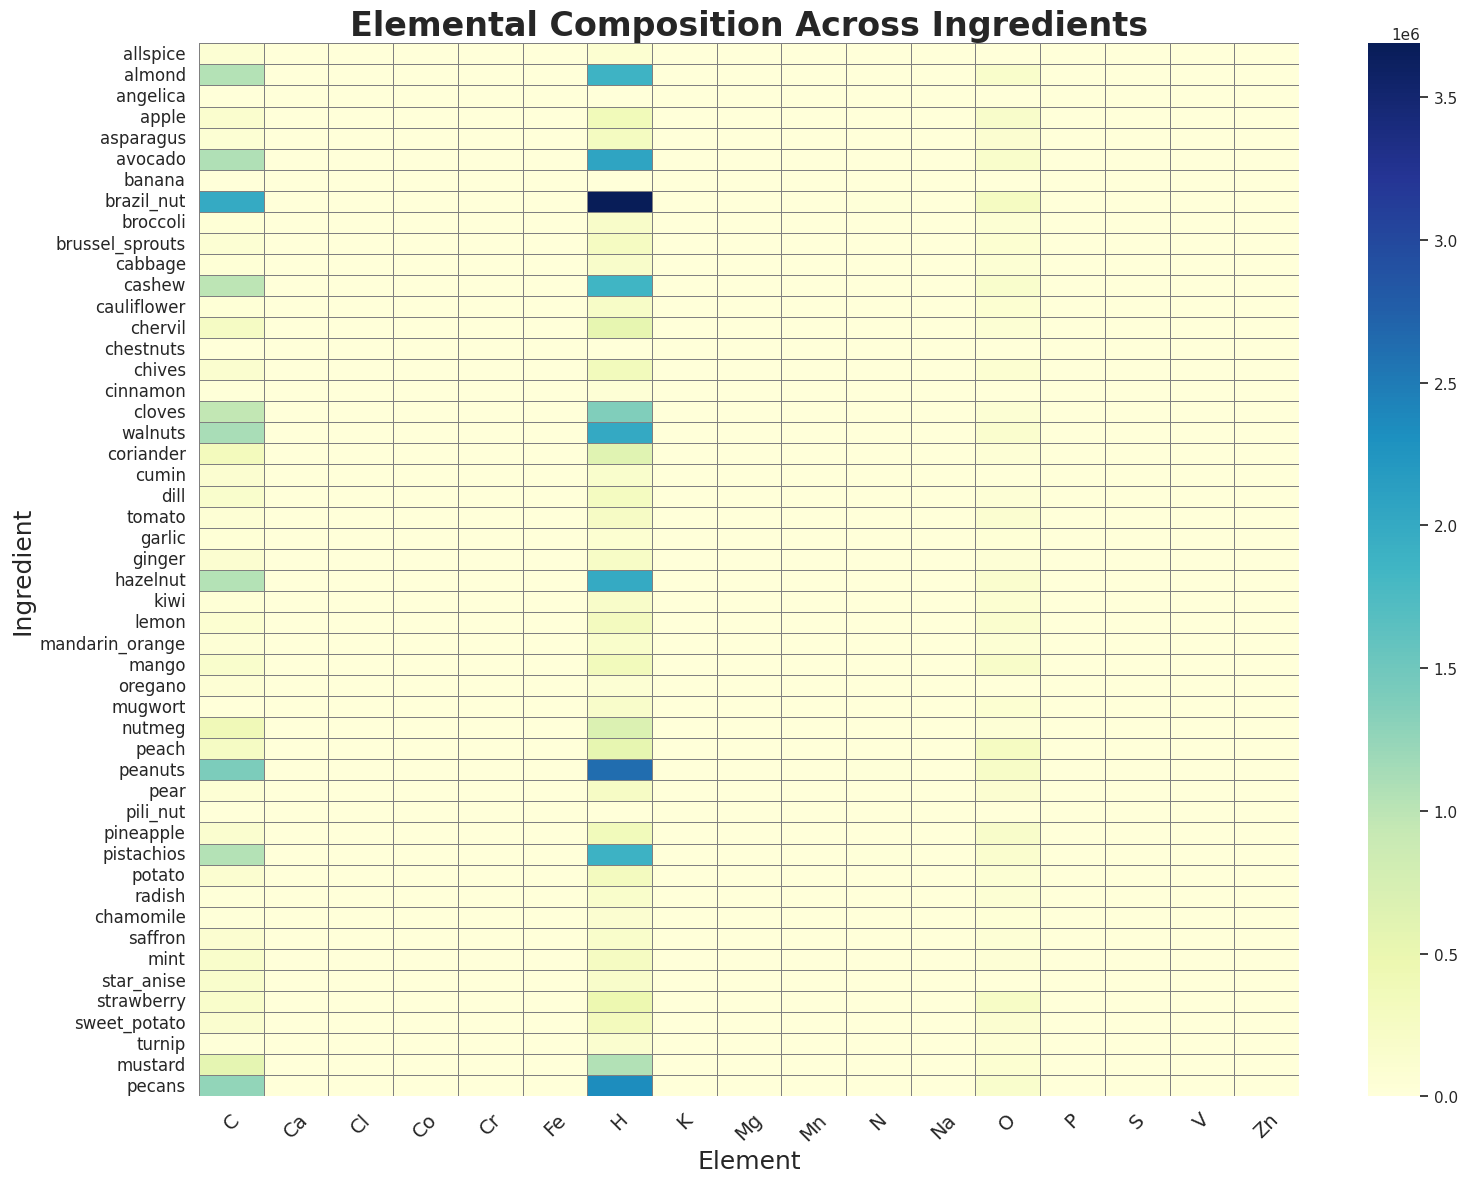

In [13]:
df = pd.read_csv("/home/dewei/workspace/SmellNet/processed_full_gcms_dataframe.csv")
df.set_index("food_name", inplace=True)

plt.figure(figsize=(16, 12))
sns.heatmap(df, cmap="YlGnBu", norm=None, linewidths=0.5, linecolor='gray')
plt.title("Elemental Composition Across Ingredients", fontsize=24, fontweight='bold')
plt.xlabel("Element", fontsize=18)
plt.ylabel("Ingredient", fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()